In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2016-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\aisha\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,37.150002,37.202999,36.562901,37.091999,37.091999,65456000
1,2016-01-05,37.322498,37.599998,36.931999,37.129002,37.129002,39014000
2,2016-01-06,36.500000,37.359001,36.445999,37.181000,37.181000,38940000
3,2016-01-07,36.515499,36.924999,35.952999,36.319500,36.319500,59274000
4,2016-01-08,36.572498,36.661499,35.650002,35.723499,35.723499,49018000
...,...,...,...,...,...,...,...
1750,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
1751,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
1752,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
1753,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [5]:
ma_100_days = data.Close.rolling(100).mean()

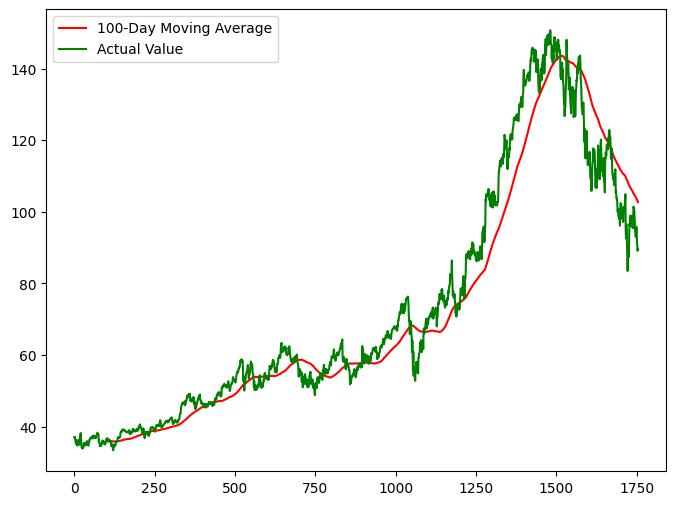

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r',label= '100-Day Moving Average')
plt.plot(data.Close,'g',label= 'Actual Value')
plt.legend()

plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

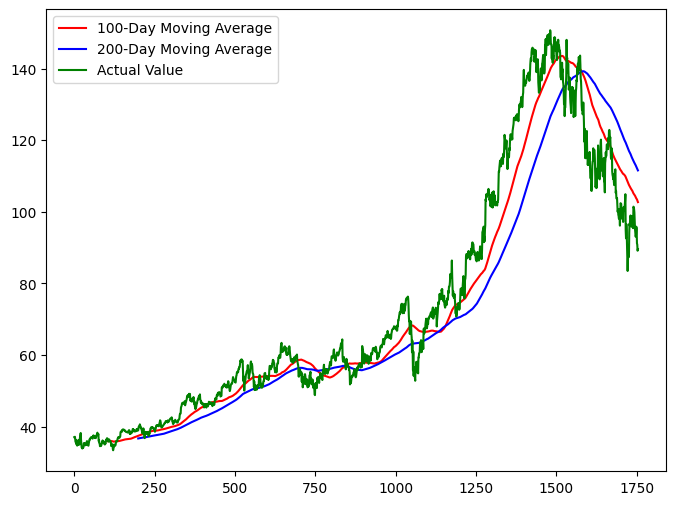

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r',label= '100-Day Moving Average')
plt.plot(ma_200_days,'b',label= '200-Day Moving Average')
plt.plot(data.Close,'g',label= 'Actual Value')
plt.legend()

plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

1404

In [12]:
data_test.shape[0]

351

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50

41/41 [==============================] - 31s 335ms/step - loss: 0.0279
Epoch 2/50
41/41 [==============================] - 14s 332ms/step - loss: 0.0073
Epoch 3/50
41/41 [==============================] - 14s 350ms/step - loss: 0.0043
Epoch 4/50
41/41 [==============================] - 15s 355ms/step - loss: 0.0044
Epoch 5/50
41/41 [==============================] - 15s 355ms/step - loss: 0.0039
Epoch 6/50
41/41 [==============================] - 15s 371ms/step - loss: 0.0046
Epoch 7/50
41/41 [==============================] - 14s 346ms/step - loss: 0.0035
Epoch 8/50
41/41 [==============================] - 15s 372ms/step - loss: 0.0044
Epoch 9/50
41/41 [==============================] - 15s 375ms/step - loss: 0.0033
Epoch 10/50
41/41 [==============================] - 16s 383ms/step - loss: 0.0030
Epoch 11/50
41/41 [==============================] - 15s 372ms/step - loss: 0.0033
Epoch 12/50
41/41 [==============================] - 16s 378ms/step - loss: 0.0032
Epoch 13/50


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

11/11 [==============================] - 4s 157ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

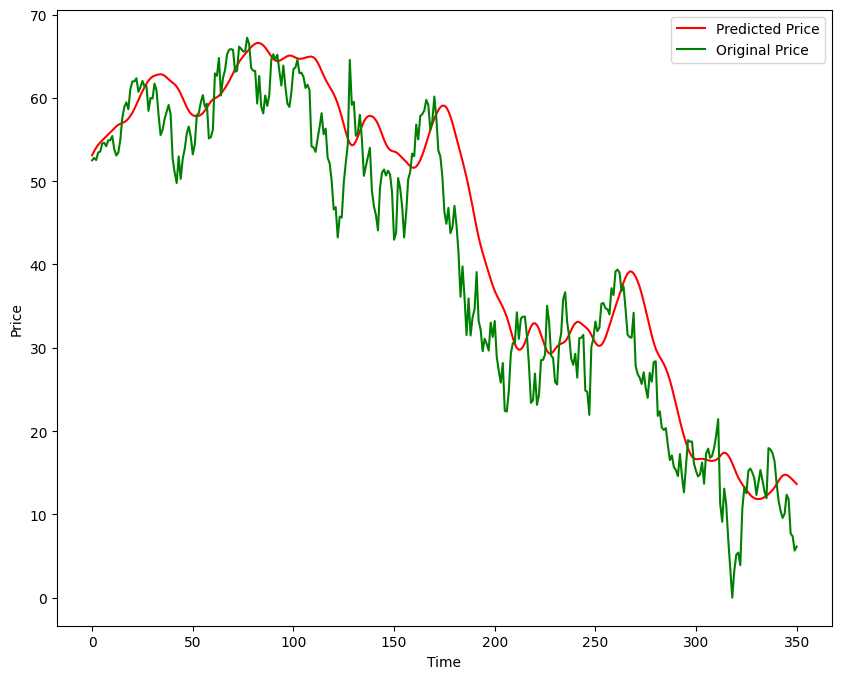

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')